In [1]:
# preprocessing of google colaboratory
!pip install colorama
!pip install smote_variants
!pip install imbalanced_databases 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.4/407.4 KB 7.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 KB 7.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.1-py3-none-any.whl size=10609 sha256=6a5184d3511d93d348215f8b51e880b7e5fc68fa5c80f64855c79a09c634e318
  Stored in directory: /root/.cache/pip/wheels/b4/aa/7a/d9a88098f7877aa95dd4f227fe614f75773654baa39b47bba6
  Created wheel for statistics: filename=statistics-1.0.3.5-py3-none-any.whl size=7453 sha256=13b4a7f793f6add4b6dab12f1fedffc8bd50e3d741e7070d42872991d94d5afe
  Stored in directory: /root/.cache/pip/wheels/26/3c/70/9467407f3aa90862061eadcd286627b23a8bab6789b667776f
Successfully built minisom statist

In [2]:
# Import packages 

In [4]:
# initial and general libraries
import time
import pandas as pd
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns 
from colorama import Fore, Back, Style
from sklearn import tree
from matplotlib.ticker import MaxNLocator
import itertools
from matplotlib import pyplot
import xgboost
from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
from xgboost import XGBClassifier
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

# machine learning libraries
import statsmodels.api as sm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis



# preprocessing libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.tree import plot_tree
from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# accuracy and metrics libraries
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# improve hyperparameters libraries
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# fill null data libraries
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

# Balancing dataset
from sklearn.utils import resample

# Feature selection
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score

#imbalaced dataset 
import smote_variants as sv
import imbalanced_databases as imbd
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTEENN
from imblearn.combine import SMOTETomek
from imblearn.ensemble import BalancedBaggingClassifier
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import pairwise_distances


# call algorithms ( classifiers)
#  Random Forest Classifier
RfcModel = RandomForestClassifier()
# call Decision Tree Algorithm
DTModel = DecisionTreeClassifier()
# Call Logistic Regression model algorithm
LRModel = LogisticRegression()
# call support vector machine
svcModel = SVC()
# call Random forest Regressor
rfrModel = RandomForestRegressor()
# call GaussianNB
nbModel = GaussianNB()
# call QuadraticDiscriminantAnalysis
qdaModel = QuadraticDiscriminantAnalysis() 

sns.set()
%matplotlib inline

# NN Librarys
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import plot_model

In [6]:
# Import dataset
OrgData = pd.read_csv('drive/MyDrive/Project/ECG Data.csv')
OrgData.head()

,videos,subjects1,subjects2,subjects3,subjects4,subjects5,subjects6,subjects7,subjects8,subjects9,...,subjects55,subjects56,subjects57,subjects58,class1,class2,class3,class4,class5,class6
0,1,1,3,3,1,2,1,3,5,2,...,1,1,1,1,36,12,6,0,4,0
1,2,1,1,1,1,1,1,3,5,1,...,2,1,1,1,40,7,5,2,3,1
2,3,1,1,2,1,1,1,1,2,2,...,2,1,1,1,39,15,2,1,0,1
3,4,1,1,1,1,1,1,1,6,1,...,1,1,1,1,42,5,6,0,3,2
4,5,1,3,2,1,1,1,3,4,1,...,2,1,1,1,38,9,5,2,4,0


In [7]:
OrgData.dtypes

videos       int64
subjects1    int64
subjects2    int64
subjects3    int64
subjects4    int64
             ...  
class2       int64
class3       int64
class4       int64
class5       int64
class6       int64
Length: 65, dtype: object

In [8]:
OrgData.describe(include = 'all').T

,count,mean,std,min,25%,50%,75%,max
videos,36.0,18.500000,10.535654,1.0,9.75,18.5,27.25,36.0
subjects1,36.0,1.444444,0.876501,1.0,1.00,1.0,1.00,4.0
subjects2,36.0,1.694444,1.166667,1.0,1.00,1.0,3.00,6.0
subjects3,36.0,2.055556,0.983999,1.0,1.00,2.0,2.25,6.0
subjects4,36.0,1.111111,0.464621,1.0,1.00,1.0,1.00,3.0
...,...,...,...,...,...,...,...,...
class2,36.0,7.000000,2.472708,3.0,5.00,6.0,8.00,15.0
class3,36.0,5.027778,2.117763,0.0,3.00,5.0,6.25,9.0
class4,36.0,1.527778,1.206793,0.0,1.00,1.0,2.00,4.0
class5,36.0,2.361111,1.073120,0.0,2.00,2.0,3.00,4.0


In [9]:
# row and column count
rowCount = OrgData.shape[0]
colCount = OrgData.shape[1]
print('dataset have '+(str(rowCount))+'     instances(rows)')
print(f'dataset have '+(str(colCount))+'  '+' features(columns)')

dataset have 36     instances(rows)
dataset have 65   features(columns)


In [10]:
#### Null data bars

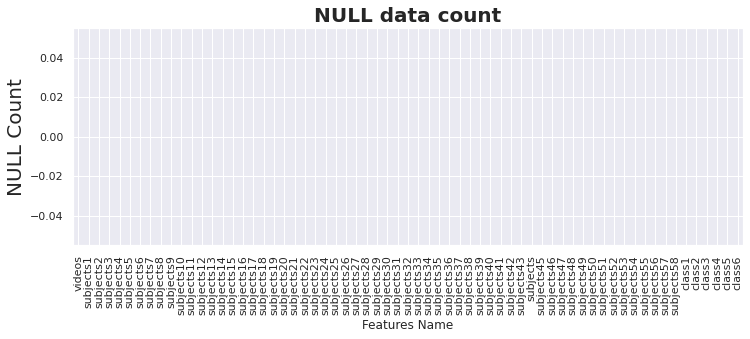

In [11]:
plt.figure(figsize = (12, 4))
orgdataBar = OrgData.isnull().sum().plot(kind = 'bar', color = 'red')
plt.xlabel('Features Name')
plt.ylabel('NULL Count', fontsize = 20)
plt.title('NULL data count', fontsize = 20,fontweight = 'bold')
plt.show()

In [12]:
#### dataset Features bar

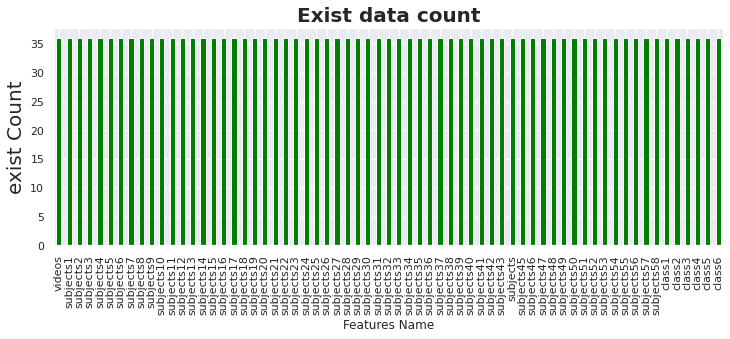

In [13]:
plt.figure(figsize = (12, 4))
OrgData.describe(include = 'all').T['count'].plot(kind = 'bar', color = 'Green')
plt.xlabel('Features Name')
plt.ylabel('exist Count', fontsize = 20)
plt.title('Exist data count', fontsize = 20,fontweight = 'bold')
plt.show()

In [14]:
# Data INFO
print(Back.BLACK + 'By null data we have ', str(len(OrgData)))
print('After drop all null data we have ', str(len(OrgData.dropna())))
print('by null data we have ', len(OrgData[OrgData.videos == 1]), ' pos instances')
print('Without null data we have ', len(OrgData.dropna()[OrgData.videos == 1]), ' pos instances')
print('dropna null data causes ',
      len(OrgData[OrgData.videos == 1]) - len(OrgData.dropna()[OrgData.videos == 1])
      ,' the lose pos instances')

By null data we have  36
After drop all null data we have  36
by null data we have  1  pos instances
Without null data we have  1  pos instances
dropna null data causes  0  the lose pos instances


In [15]:
#### feature wth null data list:
# null fetures by values
OrgData.isnull().sum()[OrgData.isnull().sum() > 0]

Series([], dtype: int64)

In [16]:
#### First NN Without Balancing

In [17]:
print('dataset have ',str(len(OrgData)),' Instances')

print('dataset have ',str(OrgData.class1.value_counts()),'class 1  Insctances')
print('dataset have ',str(OrgData.class2.value_counts()),'class 2 Instances')
print('dataset have ',str(OrgData.class3.value_counts()),'class 3 Insctances')
print('dataset have ',str(OrgData.class4.value_counts()),'class 4 Instances')
print('dataset have ',str(OrgData.class5.value_counts()),'class 5 Insctances')
print('dataset have ',str(OrgData.class6.value_counts()),'class 6 Instances')


dataset have  36  Instances
dataset have  40    4
39    4
42    4
41    4
37    4
38    3
43    3
36    2
44    2
46    2
47    1
49    1
45    1
33    1
Name: class1, dtype: int64 class 1  Insctances
dataset have  6     10
5      7
8      6
7      3
10     3
4      2
12     1
15     1
9      1
11     1
3      1
Name: class2, dtype: int64 class 2 Instances
dataset have  6    7
5    6
3    6
7    5
4    4
2    3
9    2
8    2
0    1
Name: class3, dtype: int64 class 3 Insctances
dataset have  1    11
2    10
0     8
3     4
4     3
Name: class4, dtype: int64 class 4 Instances
dataset have  2    12
3    10
1     7
4     6
0     1
Name: class5, dtype: int64 class 5 Insctances
dataset have  1    13
0    11
2     6
5     3
3     2
4     1
Name: class6, dtype: int64 class 6 Instances


In [18]:
# Because of the value count we use class 4 for analytics

In [19]:
# target feature null count & blacying value
class4Count = len(OrgData.class4)
class4Null = OrgData.class4.isnull().sum()
print(Back.GREEN+f'class4 have '+Back.RED+(str(class4Count))+Back.GREEN+' instances(rows)')
print(Back.GREEN+f'class4 have '+Back.RED+(str(class4Null))+'  '+
      Back.GREEN+' null values')
print('\n')
print(Back.GREEN+f'class4 have '+Back.RED+(str(OrgData.class4.value_counts()[0]))+Back.GREEN+' 0 value')
print(Back.GREEN+f'class4 have '+Back.RED+(str(OrgData.class4.value_counts()[1]))+Back.GREEN+' 1 value')
print(Back.GREEN+f'class4 have '+Back.RED+(str(OrgData.class4.value_counts()[2]))+Back.GREEN+' 2 value')
print(Back.GREEN+f'class4 have '+Back.RED+(str(OrgData.class4.value_counts()[3]))+Back.GREEN+' 3 value')
print(Back.GREEN+f'class4 have '+Back.RED+(str(OrgData.class4.value_counts()[4]))+Back.GREEN+' 4 value')

class4 have 36 instances(rows)
class4 have 0   null values


class4 have 8 0 value
class4 have 11 1 value
class4 have 10 2 value
class4 have 4 3 value
class4 have 3 4 value


In [20]:
#define x, y 
x = OrgData.drop('class4', axis = 1)
y = OrgData.class4

"""
changing y to (0,1,2 :0)
and 
(3,4: 1) 
for a balance clasification
"""
# We ave 0, 1; 0:low risk, 1: High risk
y[y == 0] = 0
y[y == 1] = 0
y[y == 2] = 0

y[y == 3] = 1
y[y == 4] = 1



dataset have 36 instances(rows)
dataset have 65   features(columns)


,count,mean,std,min,25%,50%,75%,max
videos,36.0,18.500000,10.535654,1.0,9.75,18.5,27.25,36.0
subjects1,36.0,1.444444,0.876501,1.0,1.00,1.0,1.00,4.0
subjects2,36.0,1.694444,1.166667,1.0,1.00,1.0,3.00,6.0
subjects3,36.0,2.055556,0.983999,1.0,1.00,2.0,2.25,6.0
subjects4,36.0,1.111111,0.464621,1.0,1.00,1.0,1.00,3.0
...,...,...,...,...,...,...,...,...
class2,36.0,7.000000,2.472708,3.0,5.00,6.0,8.00,15.0
class3,36.0,5.027778,2.117763,0.0,3.00,5.0,6.25,9.0
class4,36.0,0.194444,0.401386,0.0,0.00,0.0,0.00,1.0
class5,36.0,2.361111,1.073120,0.0,2.00,2.0,3.00,4.0


In [22]:
# row and column count
rowCount = OrgData.shape[0]
colCount = OrgData.shape[1]
print(f'dataset have '+(str(rowCount))+' instances(rows)')
print(f'dataset have '+(str(colCount))+'  '+
      ' features(columns)')

OrgData.describe(include = 'all').T

dataset have 36 instances(rows)
dataset have 65   features(columns)


,count,mean,std,min,25%,50%,75%,max
videos,36.0,18.500000,10.535654,1.0,9.75,18.5,27.25,36.0
subjects1,36.0,1.444444,0.876501,1.0,1.00,1.0,1.00,4.0
subjects2,36.0,1.694444,1.166667,1.0,1.00,1.0,3.00,6.0
subjects3,36.0,2.055556,0.983999,1.0,1.00,2.0,2.25,6.0
subjects4,36.0,1.111111,0.464621,1.0,1.00,1.0,1.00,3.0
...,...,...,...,...,...,...,...,...
class2,36.0,7.000000,2.472708,3.0,5.00,6.0,8.00,15.0
class3,36.0,5.027778,2.117763,0.0,3.00,5.0,6.25,9.0
class4,36.0,0.194444,0.401386,0.0,0.00,0.0,0.00,1.0
class5,36.0,2.361111,1.073120,0.0,2.00,2.0,3.00,4.0


In [27]:
OrgData.class4

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    1
14    0
15    0
16    0
17    0
18    1
19    0
20    0
21    1
22    0
23    1
24    0
25    0
26    0
27    0
28    1
29    0
30    1
31    0
32    1
33    0
34    0
35    0
Name: class4, dtype: int64

In [29]:
# Seperate test and train data
# use stratified method for split input and output into train and test parts: 
#trainData is Imbalanced and test data in fixed for all tests
np.random.seed(42)
trainData, testData = train_test_split(OrgData, 
                                       test_size = .2)

# percentage of trainig and test 
print(Back.BLACK + 'Percentage of trainig data is : ',Back.RED + 
      str(int(((len(trainData)/len(OrgData))*100))), ' %')
print(Back.BLACK + 'Percentage of trainig data is : ',Back.RED + 
      str(int(((len(testData)/len(OrgData))*100))), ' %')

# count of pos and neg of trainig and test parts
print(Back.BLACK + 'training data Neg instances count is : ', trainData.class4.value_counts()[0], 
     ' & pos counts : ',trainData.class4.value_counts()[1] )
print('Pos/Neg in trainig data is : ',trainData.class4.value_counts()[1]/trainData.class4.value_counts()[0] )
print(Back.RED + 'test data Neg instances count is : ', testData.class4.value_counts()[0], 
     ' & pos counts : ', testData.class4.value_counts()[1] )
print('Pos/Neg in trainig data is : ',testData.class4.value_counts()[1]/testData.class4.value_counts()[0] )

Percentage of trainig data is :  77  %
Percentage of trainig data is :  22  %
training data Neg instances count is :  24  & pos counts :  4
Pos/Neg in trainig data is :  0.16666666666666666
test data Neg instances count is :  5  & pos counts :  3
Pos/Neg in trainig data is :  0.6


In [30]:
# Data is imbalance now 
## We should balance it with balancer method
## ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# For balancing data in this part, SSO will be implemented
# -------------------------------------------------------------------------------------------------------
# Oversample trainig data with SSO

In [31]:
# define input & output
x = OrgData.drop('class4', axis = 1)
y = OrgData.class4

# call input ad output as array for function
x = np.array(x)
y = np.array(y)
# call SSO here for oversampling
oversampler= sv.SSO()
x_sampSSO, y_sampSSO= oversampler.sample(x, y)

ssotrain_x = x_sampSSO
ssotrain_y = y_sampSSO
# filtering new samples
x_sampSSO, y_sampSSO= x_sampSSO[len(x):], y_sampSSO[len(y):]

2023-03-20 15:42:16,052:INFO:SSO: Running sampling via ('SSO', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'h': 10, 'n_iter': 5, 'n_jobs': 1, 'random_state': None, 'class_name': 'SSO'}")
INFO:smote_variants:SSO: Running sampling via ('SSO', "{'proportion': 1.0, 'n_neighbors': 5, 'nn_params': {}, 'h': 10, 'n_iter': 5, 'n_jobs': 1, 'random_state': None, 'class_name': 'SSO'}")
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
2023-03-20 15:42:16,350:INFO:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: NN fitting with metric minkowski
2023-03-20 15:42:16,360:INFO:NearestNeighborsWithMetricTensor: kneighbors query minkowski
INFO:smote_variants:NearestNeighborsWithMetricTensor: kneighbors query minkowski
2023-03-20 15:42:16,440:I

In [32]:
### Create NN for unbalanced dataset, first a simple NN

# define seed 
tf.random.set_seed(42)
ssotrain_x, x_test, ssotrain_y, y_test = train_test_split(ssotrain_x, ssotrain_y,
                                       test_size = .2)
# Create a model 
unbalanced_model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# Complie the model
unbalanced_model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics = ['accuracy'])

# fit the models here
history_unbalanced_1 = unbalanced_model_1.fit(ssotrain_x, ssotrain_y, epochs = 100)
unbalanced_model_1.evaluate(x_test, y_test) # end line of results --loss & accuracy on test

Epoch 1/100
2/2 [==============================] - 1s 13ms/step - loss: 7.9712 - accuracy: 0.4773
Epoch 2/100
2/2 [==============================] - 0s 9ms/step - loss: 7.9712 - accuracy: 0.4773
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 7.9712 - accuracy: 0.4773
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 7.9712 - accuracy: 0.4773
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 7.9712 - accuracy: 0.4773
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 7.9712 - accuracy: 0.4773
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 7.9712 - accuracy: 0.4773
Epoch 8/100
2/2 [==============================] - 0s 8ms/step - loss: 7.9712 - accuracy: 0.4773
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 7.9712 - accuracy: 0.4773
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 7.9712 - accuracy: 0.4773
Epoch 11/100
2/2 [========

[7.624619007110596, 0.5]

In [ ]:
# the model summary 
unbalanced_model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 65
Trainable params: 65
Non-trainable params: 0
_________________________________________________________________


In [33]:
# define seed 
tf.random.set_seed(42)
ssotrain_x, x_test, ssotrain_y, y_test = train_test_split(ssotrain_x, ssotrain_y,
                                       test_size = .2)
# Create a model 
SSO_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Complie the model
SSO_model_2.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics = ['accuracy'])

# fit the models here
history_unbalanced_2 = SSO_model_2.fit(ssotrain_x, ssotrain_y, epochs = 100)
SSO_model_2.evaluate(x_test, y_test) # end line of results --loss & accuracy on test

Epoch 1/100
2/2 [==============================] - 1s 17ms/step - loss: 7.4068 - accuracy: 0.5143
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 7.4068 - accuracy: 0.5143
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 7.4068 - accuracy: 0.5143
Epoch 4/100
2/2 [==============================] - 0s 7ms/step - loss: 7.4068 - accuracy: 0.5143
Epoch 5/100
2/2 [==============================] - 0s 7ms/step - loss: 7.4068 - accuracy: 0.5143
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 7.4068 - accuracy: 0.5143
Epoch 7/100
2/2 [==============================] - 0s 7ms/step - loss: 7.4068 - accuracy: 0.5143
Epoch 8/100
2/2 [==============================] - 0s 7ms/step - loss: 7.4068 - accuracy: 0.5143
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 7.4068 - accuracy: 0.5143
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 7.4068 - accuracy: 0.5143
Epoch 11/100
2/2 [=========

[10.166158676147461, 0.3333333432674408]

In [34]:
# the model summary 
SSO_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 67
Trainable params: 67
Non-trainable params: 0
_________________________________________________________________


In [35]:
# define seed 
tf.random.set_seed(42)
ssotrain_x, x_test, ssotrain_y, y_test = train_test_split(ssotrain_x, ssotrain_y,
                                       test_size = .2)

# Create a model 
SSo_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu')
    
])

# Complie the model
SSo_model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                          optimizer = tf.keras.optimizers.SGD(),
                          metrics = ['accuracy'])

# fit the models here
history_unbalanced_3 = SSo_model_3.fit(ssotrain_x, ssotrain_y, epochs = 100)
SSo_model_3.evaluate(x_test, y_test) # end line of results --loss & accuracy on test

Epoch 1/100
1/1 [==============================] - 1s 649ms/step - loss: 8.1692 - accuracy: 0.4643
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 8.1692 - accuracy: 0.4643
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 8.1692 - accuracy: 0.4643
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 8.1692 - accuracy: 0.4643
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 8.1692 - accuracy: 0.4643
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1692 - accuracy: 0.4643
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 8.1692 - accuracy: 0.4643
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 8.1692 - accuracy: 0.4643
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 8.1692 - accuracy: 0.4643
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.1692 - accuracy: 0.4643
Epoch 11/100
1/1 [

[4.356925010681152, 0.7142857313156128]

In [36]:
# the model summary 
SSo_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 12)                780       
                                                                 
 dense_4 (Dense)             (None, 8)                 104       
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 893
Trainable params: 893
Non-trainable params: 0
_________________________________________________________________


In [37]:
# define seed 
tf.random.set_seed(42)
ssotrain_x, x_test, ssotrain_y, y_test = train_test_split(ssotrain_x, ssotrain_y,
                                       test_size = .2)

# Create a model 
SSO_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation = 'selu'),
    tf.keras.layers.Dense(8, activation = 'selu'),
    tf.keras.layers.Dense(1, activation = 'selu')
    
])

# Complie the model
SSO_model_4.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(), # change Optimizer to Adam by default Learning Rate
                          metrics = ['accuracy'])

# fit the models here
history_unbalanced_4 = SSO_model_4.fit(ssotrain_x, ssotrain_y, epochs = 100)
SSO_model_4.evaluate(x_test, y_test) # end line of results --loss & accuracy on test

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 16ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 20ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 16ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 17ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 16ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 20ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/100
1/1 [===

[5.1416497230529785, 0.6666666865348816]

In [38]:
# the model summary 
SSO_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 12)                780       
                                                                 
 dense_7 (Dense)             (None, 8)                 104       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 893
Trainable params: 893
Non-trainable params: 0
_________________________________________________________________


In [39]:
# define seed 
tf.random.set_seed(42)

# Create a model 
SSO5 = tf.keras.Sequential([
    tf.keras.layers.Dense(12, activation = 'relu'),
    tf.keras.layers.Dense(8, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid') # change into sigmoid
    
])

# Complie the model
SSO5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(), # change Optimizer to Adam by default Learning Rate
                          metrics = ['accuracy'])

# fit the models here
history_unbalanced_5 = SSO5.fit(ssotrain_x, ssotrain_y, epochs = 100)
SSO5.evaluate(x_test, y_test) # end line of results --loss & accuracy on test

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 1.0220 - accuracy: 0.5000
Epoch 2/100
1/1 [==============================] - 0s 12ms/step - loss: 0.9445 - accuracy: 0.5000
Epoch 3/100
1/1 [==============================] - 0s 13ms/step - loss: 0.8744 - accuracy: 0.5000
Epoch 4/100
1/1 [==============================] - 0s 15ms/step - loss: 0.8132 - accuracy: 0.5000
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 0.7561 - accuracy: 0.5000
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 0.7003 - accuracy: 0.5000
Epoch 7/100
1/1 [==============================] - 0s 14ms/step - loss: 0.6612 - accuracy: 0.5000
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6442 - accuracy: 0.5000
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 0.6425 - accuracy: 0.5000
Epoch 10/100
1/1 [==============================] - 0s 13ms/step - loss: 0.6389 - accuracy: 0.5000
Epoch 11/100
1/1 [===

1/1 [==============================] - 0s 202ms/step - loss: 0.1996 - accuracy: 1.0000


[0.19961096346378326, 1.0]

In [40]:
# the model summary 
SSO5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12)                780       
                                                                 
 dense_10 (Dense)            (None, 8)                 104       
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 893
Trainable params: 893
Non-trainable params: 0
_________________________________________________________________


In [41]:
# define seed 
tf.random.set_seed(42)

# multiple perceptron with CNN Activation (3 relu)

# Create a model 
SSO6 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'relu'), # Back to 20 like CNN Backpropagation
    tf.keras.layers.Dense(1, activation = 'relu') # Create 1 dense for multiple perceptron creation
    
])

# Complie the model
SSO6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(), 
                          metrics = ['accuracy'])

# fit the models here
history_unbalanced_6 = SSO6.fit(ssotrain_x, ssotrain_y, epochs = 50)
SSO6.evaluate(x_test, y_test) 

Epoch 1/50
1/1 [==============================] - 1s 850ms/step - loss: 7.0374 - accuracy: 0.5000
Epoch 2/50
1/1 [==============================] - 0s 11ms/step - loss: 7.0144 - accuracy: 0.5000
Epoch 3/50
1/1 [==============================] - 0s 15ms/step - loss: 7.0085 - accuracy: 0.5000
Epoch 4/50
1/1 [==============================] - 0s 12ms/step - loss: 7.0056 - accuracy: 0.5000
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 7.0023 - accuracy: 0.5000
Epoch 6/50
1/1 [==============================] - 0s 11ms/step - loss: 6.5647 - accuracy: 0.5000
Epoch 7/50
1/1 [==============================] - 0s 12ms/step - loss: 6.4173 - accuracy: 0.5455
Epoch 8/50
1/1 [==============================] - 0s 11ms/step - loss: 5.3015 - accuracy: 0.5455
Epoch 9/50
1/1 [==============================] - 0s 11ms/step - loss: 4.7514 - accuracy: 0.5455
Epoch 10/50
1/1 [==============================] - 0s 10ms/step - loss: 4.6083 - accuracy: 0.5455
Epoch 11/50
1/1 [===========

1/1 [==============================] - 0s 156ms/step - loss: 2.6740 - accuracy: 0.8333


[2.674021005630493, 0.8333333134651184]

In [46]:
# the model summary 
SSO6.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                1300      
                                                                 
 dense_13 (Dense)            (None, 20)                420       
                                                                 
 dense_14 (Dense)            (None, 1)                 21        
                                                                 
Total params: 1,741
Trainable params: 1,741
Non-trainable params: 0
_________________________________________________________________


In [42]:
#### find the best Learnig Rate for work -- work on end model

In [43]:
# define seed 
tf.random.set_seed(42)

# Create a model 
SSO7 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu') # sigmoid not good, change to relu
    
])

# Complie the model
SSO7.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(), # change Optimizer to Adam by default Learning Rate
                          metrics = ['accuracy'])

# Create learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch : 1e-4 * 10 **(epoch / 20))

# fit the models here
history_unbalanced_6 = SSO7.fit(ssotrain_x, ssotrain_y, epochs = 50, callbacks = [lr_scheduler])
SSO7.evaluate(x_test, y_test) # end line of results --loss & accuracy on test

Epoch 1/50
1/1 [==============================] - 1s 901ms/step - loss: 7.7277 - accuracy: 0.5000 - lr: 1.0000e-04
Epoch 2/50
1/1 [==============================] - 0s 10ms/step - loss: 7.7224 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/50
1/1 [==============================] - 0s 12ms/step - loss: 7.7170 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/50
1/1 [==============================] - 0s 11ms/step - loss: 7.7125 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 7.7125 - accuracy: 0.5000 - lr: 1.5849e-04
Epoch 6/50
1/1 [==============================] - 0s 15ms/step - loss: 7.7125 - accuracy: 0.5000 - lr: 1.7783e-04
Epoch 7/50
1/1 [==============================] - 0s 10ms/step - loss: 7.7125 - accuracy: 0.5000 - lr: 1.9953e-04
Epoch 8/50
1/1 [==============================] - 0s 10ms/step - loss: 7.7125 - accuracy: 0.5000 - lr: 2.2387e-04
Epoch 9/50
1/1 [==============================] - 0s 11ms/step - loss: 7.7125 - accurac

[5.1416497230529785, 0.6666666865348816]

In [44]:
### the best LR in this plot is a little bigger then 10 ** -4 -- use this value of lr on end model and its better result of unbalanced data

In [45]:
# define seed 
tf.random.set_seed(42)

# Create a model 
SSO8 = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'relu') # sigmoid not good, change to relu
    
])

# Complie the model
SSO8.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                          optimizer = tf.keras.optimizers.Adam(lr = 0.0002), # change Optimizer to Adam by default Learning Rate
                          metrics = ['accuracy'])


# fit the models here
history_unbalanced_6 = SSO8.fit(ssotrain_x, ssotrain_y, epochs = 35)
SSO8.evaluate(x_test, y_test) # end line of results --loss & accuracy on test

Epoch 1/35
1/1 [==============================] - 1s 1s/step - loss: 7.7125 - accuracy: 0.5000
Epoch 2/35
1/1 [==============================] - 0s 12ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 3/35
1/1 [==============================] - 0s 12ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 4/35
1/1 [==============================] - 0s 13ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 5/35
1/1 [==============================] - 0s 12ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 6/35
1/1 [==============================] - 0s 11ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 7/35
1/1 [==============================] - 0s 11ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 8/35
1/1 [==============================] - 0s 11ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 9/35
1/1 [==============================] - 0s 11ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 10/35
1/1 [==============================] - 0s 11ms/step - loss: 7.7125 - accuracy: 0.5000
Epoch 11/35
1/1 [==============

[5.1416497230529785, 0.6666666865348816]